In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from ggplot import *
from datetime import *

In [3]:
turnstile_weather = pd.read_csv('data/turnstile_data_master_with_weather.csv')
turnstile_weather.is_copy = False

http://bryansmithphd.com/

In [4]:
turnstile_weather.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True) 

In [5]:
turnstile_weather['week_day'] = turnstile_weather['daten'].map(
            lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())

In [6]:
import pandasql
q = """
select week_day, sum(entriesn_hourly)
from turnstile_weather
group by week_day
"""
entries_week_day = pandasql.sqldf(q.lower(), locals())

In [7]:
print entries_week_day

   week_day  sum(entriesn_hourly)
0         0              24130096
1         1              22997954
2         2              23562636
3         3              23486649
4         4              23130773
5         5              14044105
6         6              13180114


We can now plot the result.

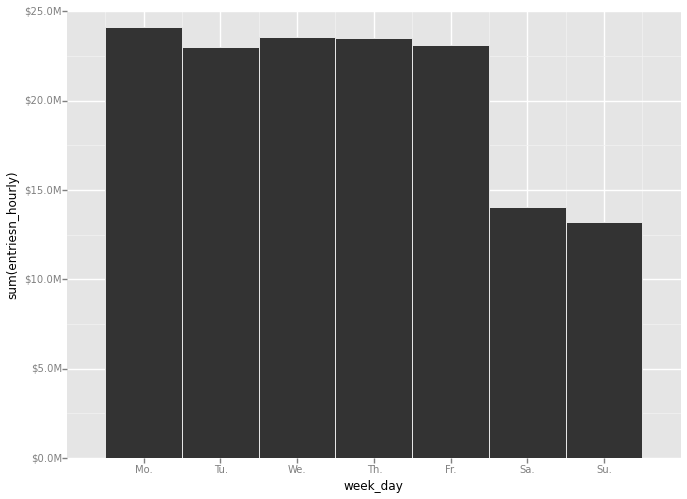

<ggplot: (283355577)>

In [10]:
ggplot(entries_week_day, aes('week_day', 'sum(entriesn_hourly)')) + geom_bar(stat="bar") + \
    scale_x_continuous(breaks=[0,1,2,3,4,5,6], labels=["Mo.", "Tu.", "We.", "Th.", "Fr.", "Sa.", "Su."]) + \
    scale_y_continuous(labels='millions')

In [ ]:
    xlab('Week day') + ylab('Number of riderships') + \ 